In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [3]:
df = pd.read_csv('clean_data.csv')

print("Исходные типы данных:")
print(df.dtypes)

df['crime'] = df['crime'].astype(int)
df['felony'] = df['felony'].astype(int)
df['high_education'] = df['high_education'].astype(int)
df['population'] = df['population'].astype(int)
df['revenue'] = df['revenue'].astype(int)

df['unemployment'] = df['unemployment'].str.replace(',', '.').astype(float)
df['birthrate'] = df['birthrate'].str.replace(',', '.').astype(float)

print("\nНовые типы данных:")
print(df.dtypes)

top_2_high_education_indices = df.nlargest(2, 'high_education').index
df = df.drop(top_2_high_education_indices)

print(df.head())
print(df.describe())

Исходные типы данных:
Region             object
crime             float64
felony            float64
high_education    float64
population        float64
revenue           float64
unemployment       object
birthrate          object
dtype: object

Новые типы данных:
Region             object
crime               int64
felony              int64
high_education      int64
population          int64
revenue             int64
unemployment      float64
birthrate         float64
dtype: object
                  Region  crime  felony  high_education  population  revenue  \
0         Алтайский край  39177   10626            5648     2268179    21779   
1       Амурская область  16253    4316            3099      772525    28136   
2  Архангельская область  17472    5077            3776     1114322    32817   
3   Астраханская область  13062    3448            3274      989430    23205   
4   Белгородская область  14588    4343            5951     1531917    29751   

   unemployment  birthrate  
0   

In [5]:
y = np.array(df['felony']) #количество тяжких и особо тяжких преступлений

print('Подушевой доход')
x = np.array(df['revenue']).reshape((-1, 1))
model = LinearRegression().fit(x, y)
print('R^2:', model.score(x, y))
print('b_0:', model.intercept_)
print('b:', model.coef_)

print('Количество преступлений') 
x = np.array(df['crime']).reshape((-1, 1))
model = LinearRegression().fit(x, y)
print('R^2:', model.score(x, y))
print('b_0:', model.intercept_)
print('b:', model.coef_)

print('Наличие высшего образования') 
x = np.array(df['high_education']).reshape((-1, 1))
model = LinearRegression().fit(x, y)
print('R^2:', model.score(x, y))
print('b_0:', model.intercept_)
print('b:', model.coef_)

print('Население') 
x = np.array(df['population']).reshape((-1, 1))
model = LinearRegression().fit(x, y)
print('R^2:', model.score(x, y))
print('b_0:', model.intercept_)
print('b:', model.coef_)

print('Уровень безработицы') 
x = np.array(df['unemployment']).reshape((-1, 1))
model = LinearRegression().fit(x, y)
print('R^2:', model.score(x, y))
print('b_0:', model.intercept_)
print('b:', model.coef_)

print('Коэффициент рождаемости') 
x = np.array(df['birthrate']).reshape((-1, 1))
model = LinearRegression().fit(x, y)
print('R^2:', model.score(x, y))
print('b_0:', model.intercept_)
print('b:', model.coef_)

Подушевой доход
R^2: 0.042951893372292105
b_0: 2955.6754664499435
b: [0.11367016]
Количество преступлений
R^2: 0.9695970197111382
b_0: -534.0091841602789
b: [0.29556812]
Наличие высшего образования
R^2: 0.8632704748130762
b_0: -119.42979227771593
b: [1.12929918]
Население
R^2: 0.9431504797860727
b_0: 220.69578871117756
b: [0.0034695]
Уровень безработицы
R^2: 0.13267762026041563
b_0: 12834.974834936256
b: [-467.42750089]
Коэффициент рождаемости
R^2: 0.06236810349104971
b_0: 14853.717364805405
b: [-5633.06028315]


In [6]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


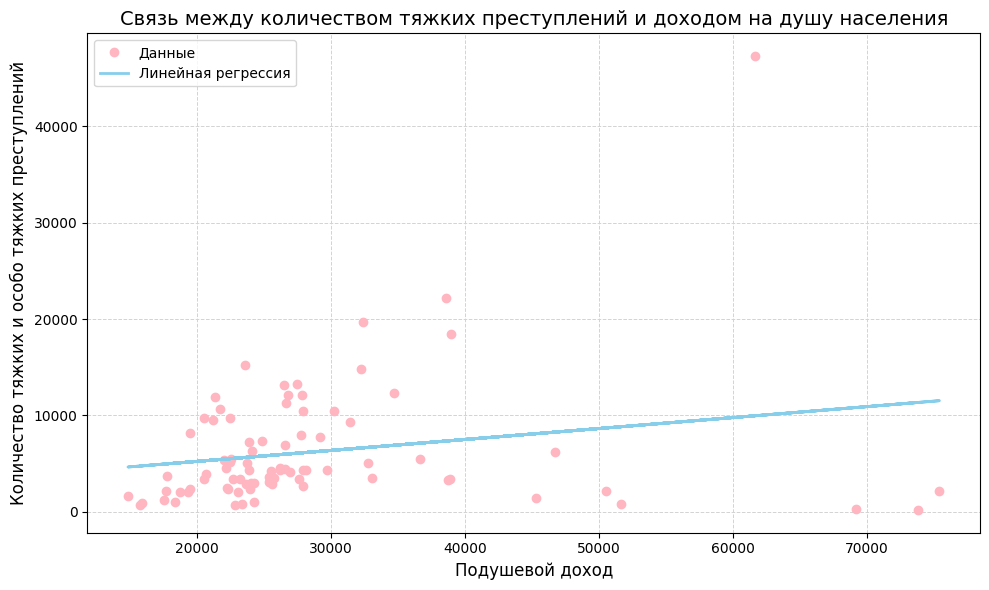

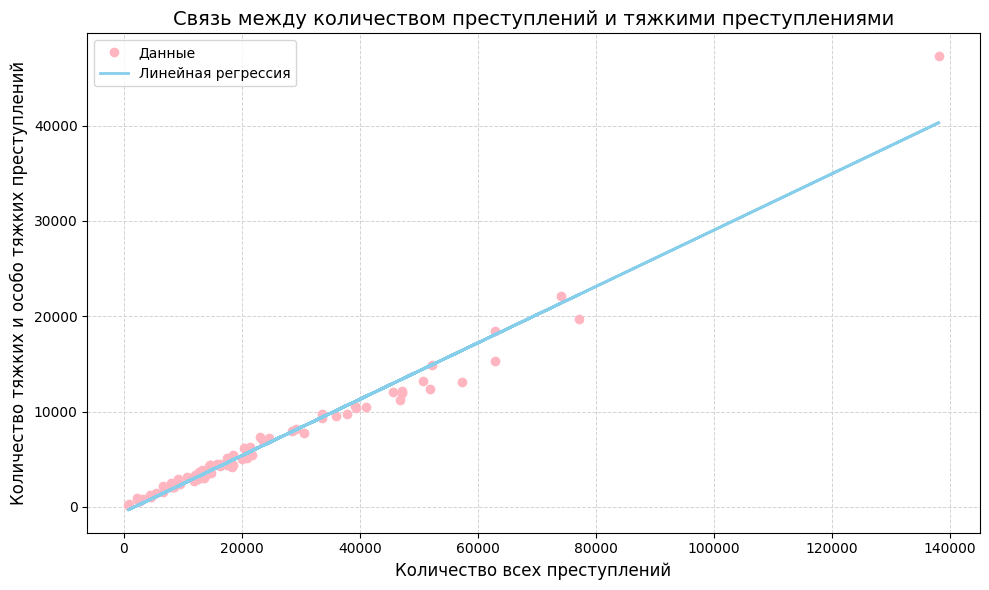

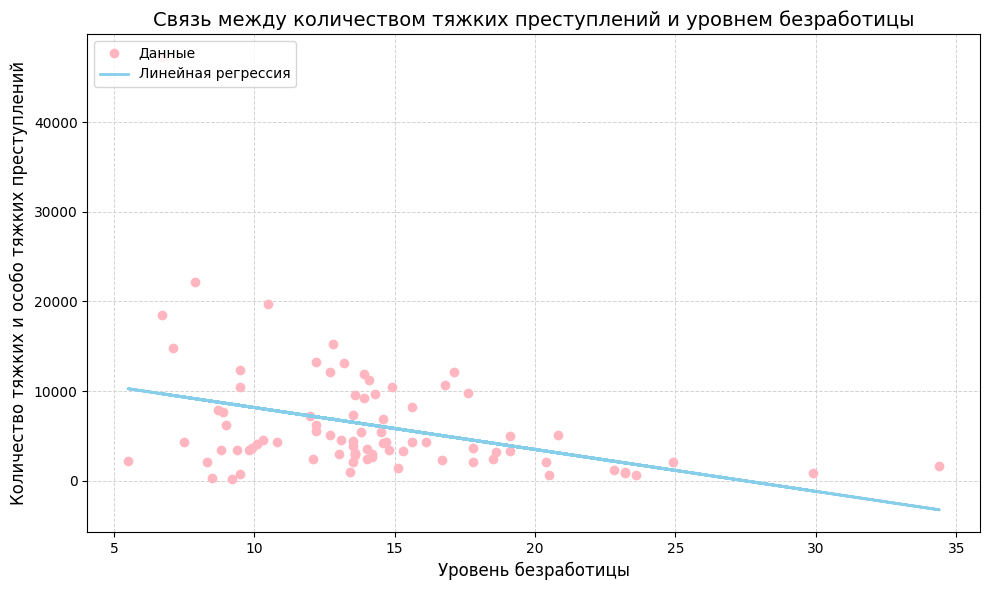

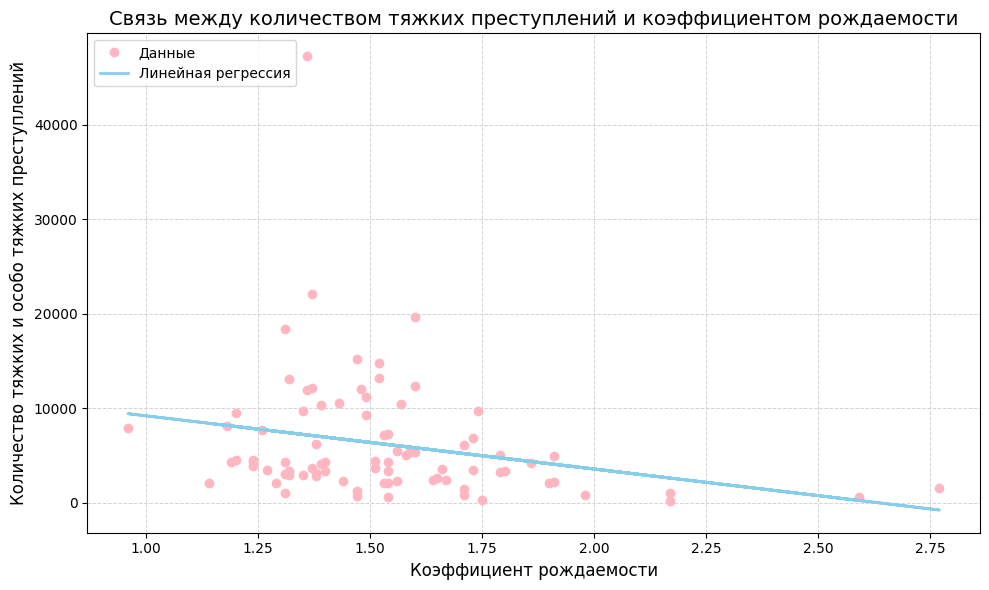

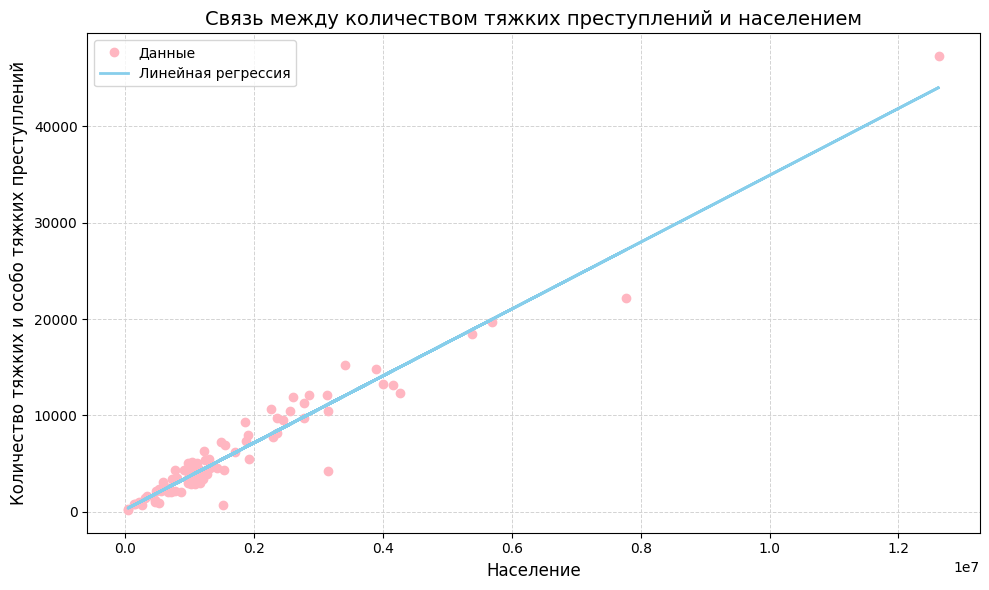

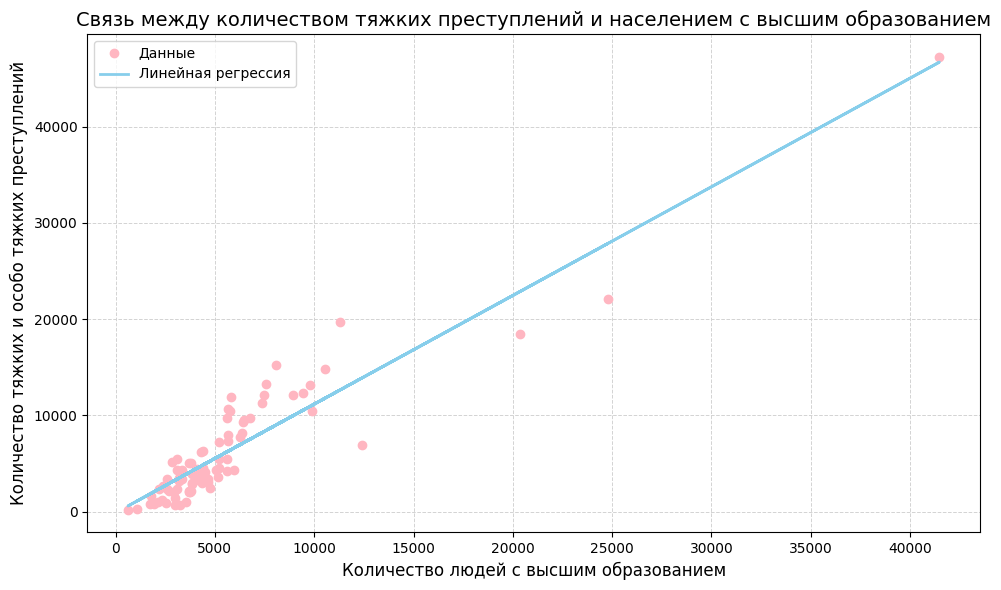

In [7]:
x = np.array(df['revenue']).reshape((-1, 1))
y = np.array(df['felony'])
model = LinearRegression().fit(x, y)

plt.figure(figsize=(10, 6)) 
plt.plot(x, y, 'o', color='#FFB6C1', label='Данные') 
plt.plot(x, model.predict(x), color='#87CEEB', label='Линейная регрессия', linewidth=2)
plt.xlabel('Подушевой доход', fontsize=12)
plt.ylabel('Количество тяжких и особо тяжких преступлений', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, color='#D3D3D3')
plt.title('Связь между количеством тяжких преступлений и доходом на душу населения', fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


x = np.array(df['crime']).reshape((-1, 1))
y = np.array(df['felony'])
model = LinearRegression().fit(x, y)

plt.figure(figsize=(10, 6)) 
plt.plot(x, y, 'o', color='#FFB6C1', label='Данные') 
plt.plot(x, model.predict(x), color='#87CEEB', label='Линейная регрессия', linewidth=2)
plt.xlabel('Количество всех преступлений', fontsize=12)
plt.ylabel('Количество тяжких и особо тяжких преступлений', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, color='#D3D3D3')
plt.title('Связь между количеством преступлений и тяжкими преступлениями', fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


x = np.array(df['unemployment']).reshape((-1, 1))
y = np.array(df['felony'])
model = LinearRegression().fit(x, y)

plt.figure(figsize=(10, 6)) 
plt.plot(x, y, 'o', color='#FFB6C1', label='Данные') 
plt.plot(x, model.predict(x), color='#87CEEB', label='Линейная регрессия', linewidth=2)
plt.xlabel('Уровень безработицы', fontsize=12)
plt.ylabel('Количество тяжких и особо тяжких преступлений', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, color='#D3D3D3')
plt.title('Связь между количеством тяжких преступлений и уровнем безработицы', fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

x = np.array(df['birthrate']).reshape((-1, 1))
y = np.array(df['felony'])
model = LinearRegression().fit(x, y)

plt.figure(figsize=(10, 6)) 
plt.plot(x, y, 'o', color='#FFB6C1', label='Данные') 
plt.plot(x, model.predict(x), color='#87CEEB', label='Линейная регрессия', linewidth=2)
plt.xlabel('Коэффициент рождаемости', fontsize=12)
plt.ylabel('Количество тяжких и особо тяжких преступлений', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, color='#D3D3D3')
plt.title('Связь между количеством тяжких преступлений и коэффициентом рождаемости', fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

x = np.array(df['population']).reshape((-1, 1))
y = np.array(df['felony'])
model = LinearRegression().fit(x, y)

plt.figure(figsize=(10, 6)) 
plt.plot(x, y, 'o', color='#FFB6C1', label='Данные') 
plt.plot(x, model.predict(x), color='#87CEEB', label='Линейная регрессия', linewidth=2)
plt.xlabel('Население', fontsize=12)
plt.ylabel('Количество тяжких и особо тяжких преступлений', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, color='#D3D3D3')
plt.title('Связь между количеством тяжких преступлений и населением', fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

x = np.array(df['high_education']).reshape((-1, 1))
y = np.array(df['felony'])
model = LinearRegression().fit(x, y)

plt.figure(figsize=(10, 6)) 
plt.plot(x, y, 'o', color='#FFB6C1', label='Данные') 
plt.plot(x, model.predict(x), color='#87CEEB', label='Линейная регрессия', linewidth=2)
plt.xlabel('Количество людей с высшим образованием', fontsize=12)
plt.ylabel('Количество тяжких и особо тяжких преступлений', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, color='#D3D3D3')
plt.title('Связь между количеством тяжких преступлений и населением с высшим образованием', fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


Решила поставить основным регрессором количество людей с высшим образованием

In [9]:
print('Наличие высшего образования') 
x = np.array(df['high_education']).reshape((-1, 1))
model = LinearRegression().fit(x, y)
print('R^2:', model.score(x, y))
print('b_0:', model.intercept_)
print('b:', model.coef_)

Наличие высшего образования
R^2: 0.8632704748130762
b_0: -119.42979227771593
b: [1.12929918]


In [10]:
# подгон линейной регрессии и отчет с результатами 
X = sm.add_constant(x)
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     511.4
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           9.55e-37
Time:                        17:56:21   Log-Likelihood:                -763.74
No. Observations:                  83   AIC:                             1531.
Df Residuals:                      81   BIC:                             1536.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -119.4298    386.360     -0.309      0.7

## Множественная регрессия 

In [14]:
X = df[['revenue', 
       'crime', 
       'high_education', 
       'unemployment', 
       'birthrate', 
       'population']]

model = LinearRegression().fit(X, y)
r_sq = model.score(X, y)
print('R^2:', model.score(X, y))
print('b_0:', model.intercept_)
print('b:', model.coef_)
       
X = sm.add_constant(X, prepend = False)
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

R^2: 0.9886549694693842
b_0: -1621.580034532487
b: [ 2.75807245e-02  2.18627550e-01  2.97676241e-01  6.22165339e+01
 -5.11261430e+02  1.67313971e-04]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1104.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           9.23e-72
Time:                        21:17:21   Log-Likelihood:                -660.43
No. Observations:                  83   AIC:                             1335.
Df Residuals:                      76   BIC:                             1352.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|  

In [17]:
df1 = df[['revenue', 
       'crime', 
       'high_education', 
       'unemployment', 
       'birthrate', 
       'population']]

# вычисляем корреляционную матрицу для столбцов (показывает коэффициенты корреляции Пирсона между каждой парой столбцов)
print(df1.corr())

                 revenue     crime  high_education  unemployment  birthrate  \
revenue         1.000000  0.160888        0.254840     -0.581557   0.165868   
crime           0.160888  1.000000        0.878545     -0.363154  -0.261690   
high_education  0.254840  0.878545        1.000000     -0.371927  -0.234701   
unemployment   -0.581557 -0.363154       -0.371927      1.000000   0.473235   
birthrate       0.165868 -0.261690       -0.234701      0.473235   1.000000   
population      0.199009  0.955426        0.944144     -0.366574  -0.219299   

                population  
revenue           0.199009  
crime             0.955426  
high_education    0.944144  
unemployment     -0.366574  
birthrate        -0.219299  
population        1.000000  
